In [1]:
import pandas as pd

In [4]:
##As usual let us start by loading in our dataset
df = pd.read_csv("megaGymDataset.csv")
df.head() ##Inspecting our first few rows

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [6]:
##Let us start cleaning our data by checking for missing values
print(df.isnull().sum())

Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64


In [ ]:
## Description (Desc) and Rating Description (RatingDesc): These columns have a significant amount of missing data. 
## Since these columns might not be critical for our analysis, we can choose to drop them if they don't add value to our predictive models.
## Equipment: This column has 32 missing values. 
## We can fill these with a placeholder like 'Unknown' or drop the rows if equipment is a critical feature.
## Rating: This column has 1887 missing values, which is significant. 
## We can either drop these rows or impute the missing ratings with the mean or median rating.

In [9]:
# We start of ny dropping columns with significant missing values if they are not critical
df.drop(columns=['Desc', 'RatingDesc'], inplace=True)

In [12]:
# We now fill missing 'Equipment' values with 'Unknown'
df['Equipment'].fillna('Unknown', inplace=True)

In [13]:
# Impute missing 'Rating' values with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


C:\Users\tpmut\AppData\Local\Temp\ipykernel_10760\1303397000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [14]:
# Impute missing 'Rating' values with the mean rating
df.loc[:, 'Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [15]:
# Check if there are any remaining missing values
print(df.isnull().sum())

Unnamed: 0    0
Title         0
Type          0
BodyPart      0
Equipment     0
Level         0
Rating        0
dtype: int64


In [16]:
## Great, we have now cleared our data of all null values

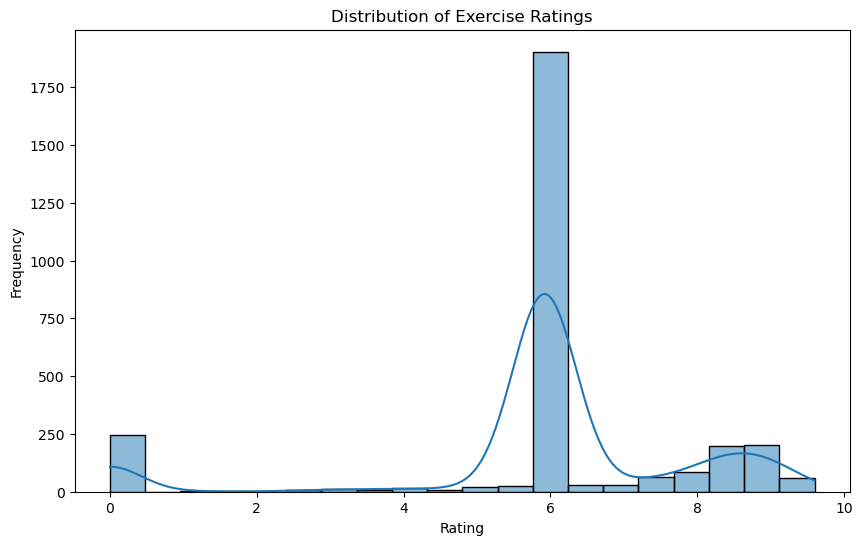

In [17]:
# Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Exercise Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [18]:
## From the above graph we see that the most common given rating is a rating of 6 which was given by over 1750 users

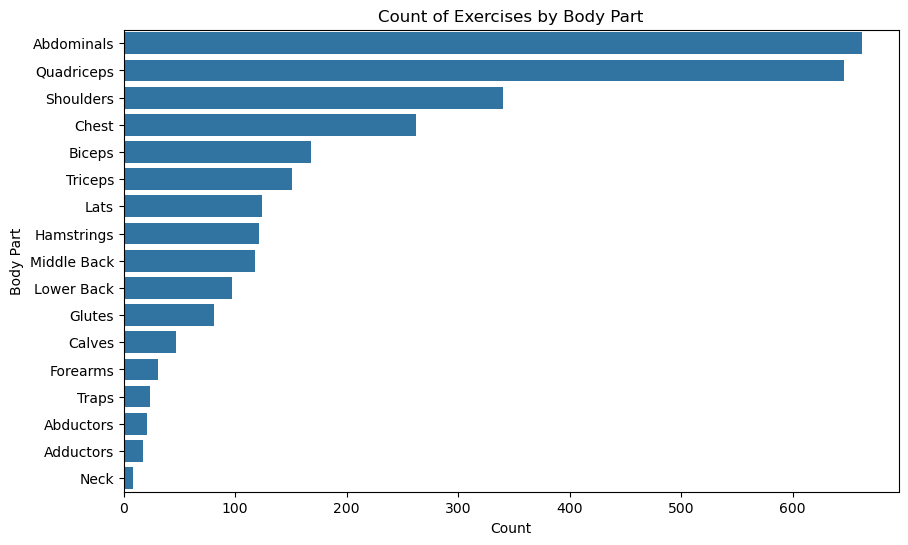

In [19]:
# Count of exercises by body part
plt.figure(figsize=(10, 6))
sns.countplot(y='BodyPart', data=df, order=df['BodyPart'].value_counts().index)
plt.title('Count of Exercises by Body Part')
plt.xlabel('Count')
plt.ylabel('Body Part')
plt.show()

In [ ]:
## From the above graph wer see that the most commonly trained body part is the abdominals
## followed by the quadriceps and shoulders with the least trained body parts being the neck followed by the adductors.

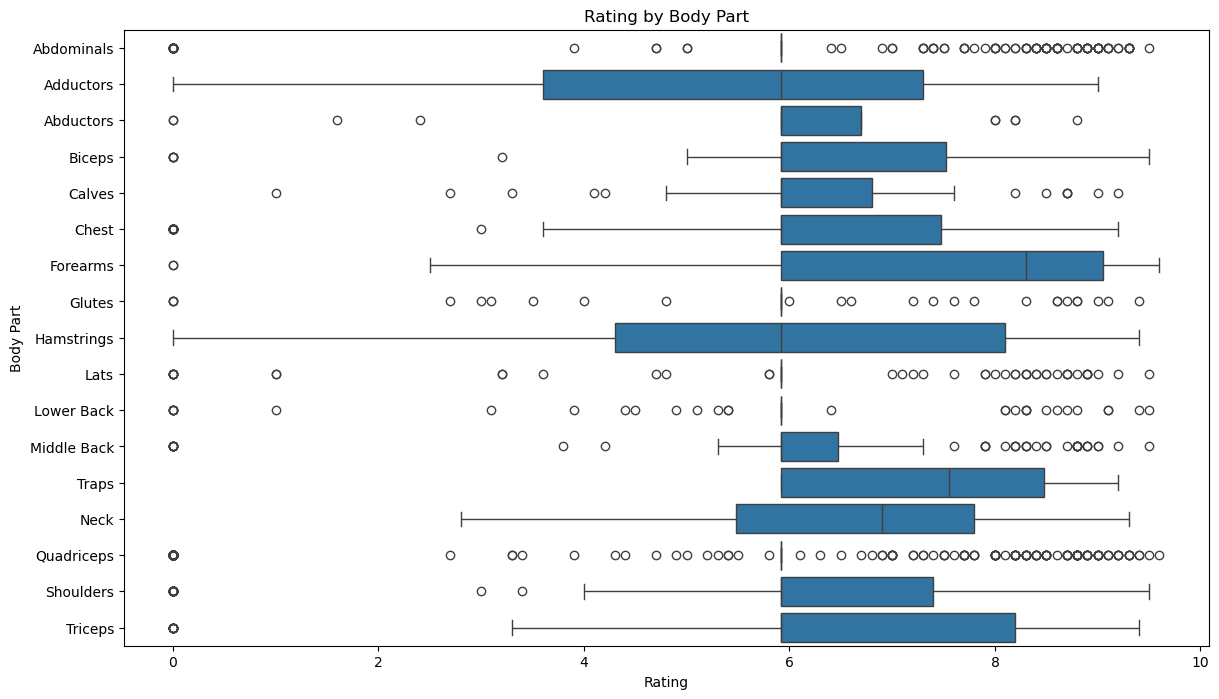

In [20]:
# Rating by Body Part
plt.figure(figsize=(14, 8))
sns.boxplot(x='Rating', y='BodyPart', data=df)
plt.title('Rating by Body Part')
plt.xlabel('Rating')
plt.ylabel('Body Part')
plt.show()

In [21]:
## We can note that majority of thhe exercise rating lie within the rangees of 6-10 

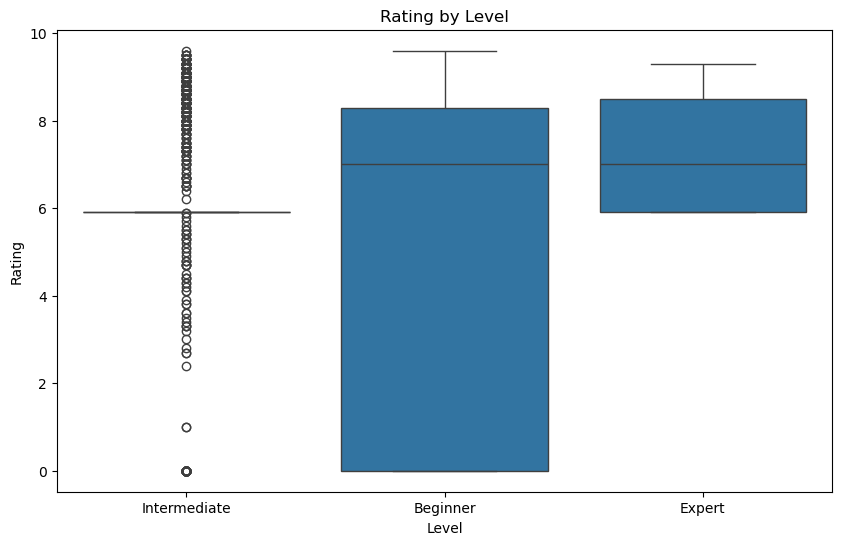

In [22]:
# Rating by Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Rating', data=df)
plt.title('Rating by Level')
plt.xlabel('Level')
plt.ylabel('Rating')
plt.show()

In [ ]:
##From this we can note that most of the experts provided ratings of 6-8 with the beginners mostly rating from 0-6

In [ ]:
##Now let us perfom some feature engineerint to our data


In [23]:

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Type', 'BodyPart', 'Equipment', 'Level'], drop_first=True)


In [24]:
# Define features and target
X = df_encoded.drop(columns=['Title', 'Rating'])
y = df_encoded['Rating']

In [25]:
## We get to our favourite part which is the predicictive modelling where we develop predictive models

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}, R2: {r2_score(y_test, y_pred):.4f}")

C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - RMSE: 1.9795, R2: 0.0905
Random Forest - RMSE: 1.3115, R2: 0.6008


C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
## WE see that the random forest regressor is the better model based on our visual evaluation

In [32]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

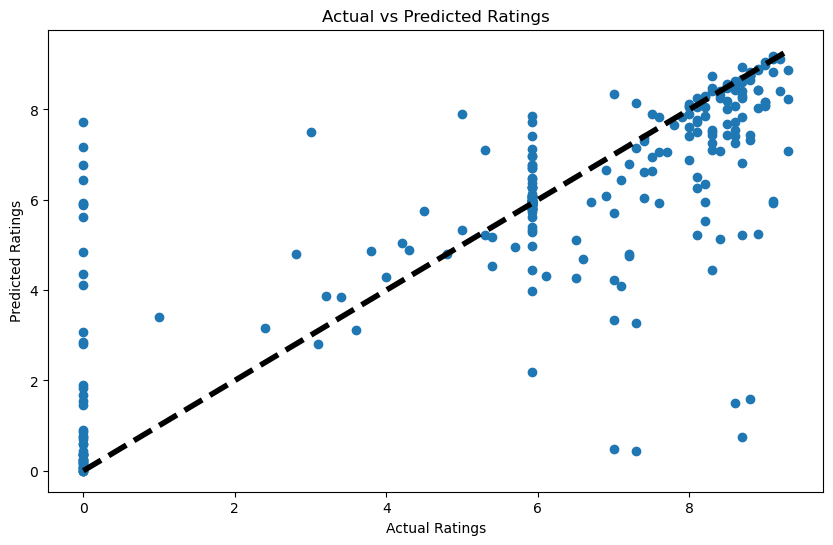

In [33]:
# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [ ]:
##Now because we have our model,let us now make larger scale predictions


In [34]:
# Retrain the model on the entire dataset
best_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [35]:
import numpy as np

# Creating hypothetical new exercises
new_exercises = pd.DataFrame({
    'Title': ['New Exercise 1', 'New Exercise 2', 'New Exercise 3'],
    'Type': ['Strength', 'Cardio', 'Strength'],
    'BodyPart': ['Abdominals', 'Legs', 'Arms'],
    'Equipment': ['Bands', 'Dumbbells', 'None'],
    'Level': ['Intermediate', 'Beginner', 'Advanced']
})

In [36]:
# Encode the new exercises using the same encoding as the original dataset
new_exercises_encoded = pd.get_dummies(new_exercises, columns=['Type', 'BodyPart', 'Equipment', 'Level'], drop_first=True)


In [37]:
# Ensure the new DataFrame has the same columns as the training set
missing_cols = set(X.columns) - set(new_exercises_encoded.columns)
for c in missing_cols:
    new_exercises_encoded[c] = 0
new_exercises_encoded = new_exercises_encoded[X.columns]

In [39]:
# Standardize the features using the same scaler
new_exercises_scaled = scaler.transform(new_exercises_encoded)

# Predict ratings for new exercises
predicted_ratings = best_model.predict(new_exercises_scaled)

C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
# Add predicted ratings to the new exercises DataFrame
new_exercises['Predicted Rating'] = predicted_ratings

print(new_exercises)

            Title      Type    BodyPart  Equipment         Level  \
0  New Exercise 1  Strength  Abdominals      Bands  Intermediate   
1  New Exercise 2    Cardio        Legs  Dumbbells      Beginner   
2  New Exercise 3  Strength        Arms       None      Advanced   

   Predicted Rating  
0           6.92756  
1           6.92756  
2           6.92756  


In [ ]:
## We have now run a prediction on how our future data value would be.